XGBoost Accuracy: 0.5552486187845304
XGBoost Precision: 0.527027027027027
XGBoost Recall: 0.46153846153846156
XGBoost F1 Score: 0.4921135646687697


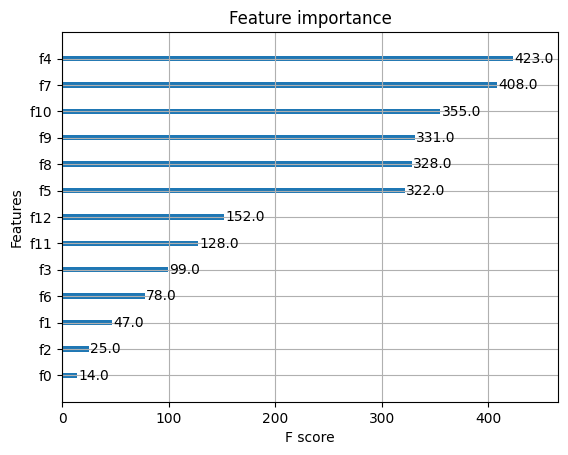

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import joblib
import xgboost as xgb
from xgboost import plot_importance
import matplotlib.pyplot as plt

# Load the data
file_path = '../analyze/zigzagStrategy.d/top1000.csv.gz'
data = pd.read_csv(file_path)

# Preprocess the data
# Assuming the target column is named 'result' where 'win' is 1 and 'lose' is 0
data['result'] = data['result'].map({'win': 1, 'lose': 0})

# Features and target
X = data[['trend','prefer_recent_peaks','peak_broken','mado','acc','trend_rate','chiko','len_std','hara_rate','up_hige_rate','dw_hige_rate','reversed_cnt','momiai']]
#          f0      f1                    f2            f3     f4    f5           f6      f7        f8          f9             f10            f11            f12
y = data['result']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train an XGBoost classifier
xgb_clf = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_clf.fit(X_train, y_train)

# Predict on the test data
y_pred_xgb = xgb_clf.predict(X_test)

# Evaluate the XGBoost model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)

print(f"XGBoost Accuracy: {accuracy_xgb}")
print(f"XGBoost Precision: {precision_xgb}")
print(f"XGBoost Recall: {recall_xgb}")
print(f"XGBoost F1 Score: {f1_xgb}")

# Plot feature importance
plot_importance(xgb_clf)
plt.show()